**«Случайные марковские процессы»**

**Задание**

1. Скачайте текст произведения «Война и мир»: ссылка на GitHub (https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4/war_and_peace).

2. Очистите его, оставив только русские буквы и символы пробела.

3. Постройте матрицу переходных вероятностей.

4. Посчитайте вероятность встретить строку из четырёх символов, которая начинается на букву «П» и заканчивается на букву «Р».

5. Используя матрицу переходных вероятностей, сгенерируйте слово, начинающееся с буквы «Б» длиной восемь символов.

6. Выберите временной ряд и оцените его через HMM.

7. Попробуйте построить через среднее каждой компоненты наивный прогноз ряда.

In [6]:
import glob
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1. Скачайте текст произведения «Война и мир»: ссылка на GitHub (https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4/war_and_peace).**

In [7]:
book_files = glob.glob('*.txt')
book_files

['tom_4.txt', 'tom_2.txt', 'tom_1.txt', 'tom_3.txt']

In [8]:
texts = []
titles = []

for file in book_files:
    text = open(file).read()
    title = re.search(r'(\w+)\.txt', file).group(1)
    texts.append(text)
    titles.append(title)

In [9]:
texts[0]

"Annotation\n\n\nЛев Толстой\n\nВойна и Мир\n\nТом 4\n\n\n\n\n\n* * *\n\n\n\nТом IVЧАСТЬ ПЕРВАЯI\n\nII\n\nIII\n\nIV\n\nV\n\nVI\n\nVII\n\nVIII\n\nIX\n\nХ\n\nXI\n\nXII\n\nXIII\n\nXIV\n\nXV\n\nXVI\n\n\n\n\n\nЧАСТЬ ВТОРАЯI\n\nII\n\nIII\n\nIV\n\nV\n\nVI\n\nVII\n\nVIII\n\nIX\n\nХ\n\nXI\n\nXII\n\nXIII\n\nXIV\n\nXV\n\nXVI\n\nXVII\n\nXVIII\n\nXIX\n\n\n\n\n\nЧАСТЬ ТРЕТЬЯI\n\nII\n\nIII\n\nIV\n\nV\n\nVI\n\nVII\n\nVIII\n\nIX\n\nХ\n\nXI\n\nXII\n\nXIII\n\nXIV\n\nXV\n\nXVI\n\nXVII\n\nXVIII\n\nXIX\n\n\n\n\n\nЧАСТЬ ЧЕТВЕРТАЯI\n\nII\n\nIII\n\nIV\n\nV\n\nVI\n\nVII\n\nVIII\n\nIX\n\nХ\n\nXI\n\nXII\n\nXIII\n\nXIV\n\nXV\n\nXVI\n\nXVII\n\nXVIII\n\nXIX\n\nXX\n\n\n\n\n\nЭПИЛОГЧасть перваяI\n\nII\n\nIII\n\nIV\n\nV\n\nVI\n\nVII\n\nVIII\n\nIX\n\nХ\n\nXI\n\nXII\n\nXIII\n\nXIV\n\nXV\n\nXVI\n\n\n\n\n\nЧасть втораяI\n\nII\n\nIII\n\nIV\n\nV\n\nVI\n\nVII\n\nVIII\n\nIX\n\nХ\n\nXI\n\nXII\n\n\n\n\n\n* * *\n\n\n\n\n\nТом IV\n\n\nЛев Николаевич Толстой\n\nВОЙНА И МИР\n\nТом 4\n\n\n\n\nЧАСТЬ ПЕРВАЯ\n\n\n\n\nI\n\n\n\n\nВ Петерб

**2. Очистите его, оставив только русские буквы и символы пробела.**

In [10]:
clean_texts = [re.sub('[^а-яА-ЯЁ]+', ' ', text) for text in texts] # оставляем только буквы кириллицы и пробелы
clean_texts = [text.lower() for text in clean_texts] # приводим к нижнему регистру

clean_text = ' '.join(clean_texts)

In [11]:
type(clean_texts), type(clean_text)

(list, str)

In [12]:
"ё" in clean_text # в текстах нет буквы "ё"

False

**3. Постройте матрицу переходных вероятностей.**

In [13]:
alphabet = 'абвгдежзийклмнопрстуфхцчшщьыъэюя ' # в алфавит включен пробел, исключена буква "ё" (т.к. ее нет в рассметриваемых текстах)
POS = {l: i for i, l in enumerate(alphabet)}

In [14]:
probabilities = np.zeros((len(alphabet), len(alphabet)))

In [15]:
for cp, cn in zip(clean_text[:-1], clean_text[1:]):
  probabilities[POS[cp], POS[cn]] += 1

In [16]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [17]:
df = pd.DataFrame(probabilities, index=(c for c in alphabet), columns=(c for c in alphabet))

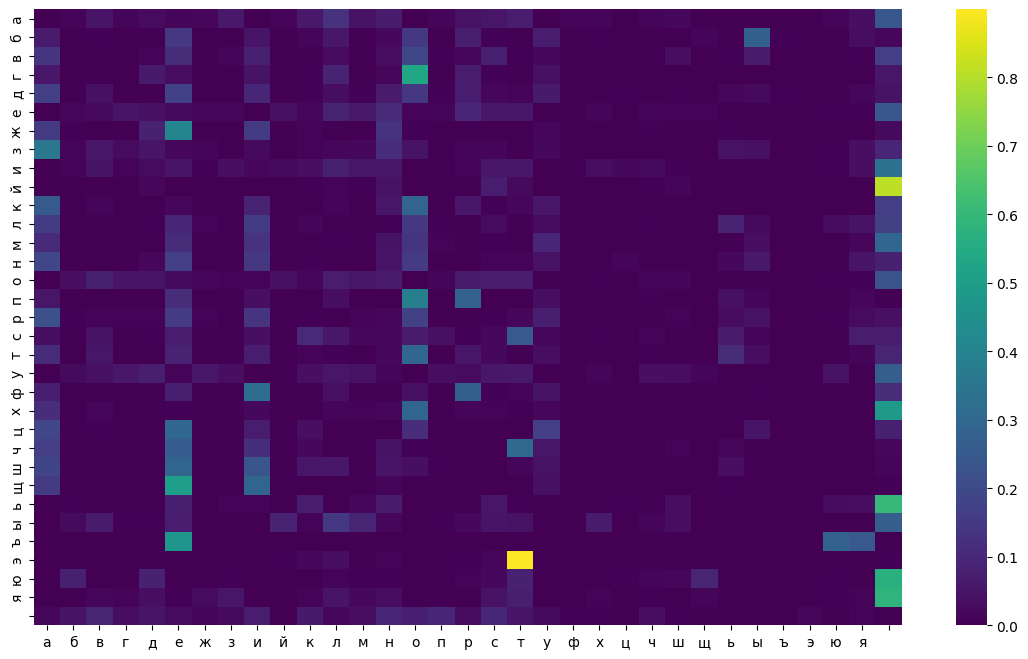

In [18]:
plt.figure(figsize=(14,8))
sns.heatmap(df, cmap='viridis')
plt.show()

Согласно матрице переходных вероятностей, после буквы "э" примерно с 90%-ой вероятностью следует буква "т", после "й" вероятнее других символов появляется пробел. Такж в матрице заметны вертикали, соответствующие буквам "а", "е", "и", "о": эти гласные с большей вероятностью, чем другие буквы, являются предшествующими символами.

**4. Посчитайте вероятность встретить строку из четырёх символов, которая начинается на букву «П» и заканчивается на букву «Р».**

В строке из 4-х символов для перехода от первой буквы к последней понадобится 3 шага, поэтому матрицу перехода нужно будет возвести в 3 степень. Искомая вероятность - на пересечении строки "п" и столбца "р".

In [19]:
(df @ df @ df).loc['п', 'р']

0.0322903758055181

**5. Используя матрицу переходных вероятностей, сгенерируйте слово, начинающееся с буквы «Б» длиной восемь символов.**

Для выполнения задания понадобится матрица переходных вероятностей без пробела.

In [20]:
alphabet_0 = 'абвгдеёжзийклмнопрстуфхцчшщьыъэюя'
POS_0 = {l: i for i, l in enumerate(alphabet_0)}

In [21]:
probabilities_0 = np.zeros((len(alphabet_0), len(alphabet_0)))

In [22]:
for cp, cn in zip(clean_text[:-1], clean_text[1:]):
  probabilities_0[POS[cp], POS[cn]] += 1

In [23]:
probabilities_0 = (probabilities_0 / probabilities_0.sum(axis=1)[:, None])

In [24]:
s = []
start_0 = 'б'
s.append(start_0)
length = 8
for i in range(length):
    index = POS_0[s[i]]
    next_char = np.random.choice(list(alphabet_0), p=probabilities_0[index])
    s.append(next_char)

print (''.join(s))

бьжяеянке


**6. Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через Hidden Markov Model.**

Исследуемый ряд - еженедельные значения индекса Доу-Джонса на момент закрытия биржи (weekly-closings-of-the-dowjones-.csv).

In [25]:
series = pd.read_csv('weekly-closings-of-the-dowjones-.csv')['Close']

In [26]:
!pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 3.5 MB/s eta 0:00:00


In [27]:
from hmmlearn.hmm import GaussianHMM

In [28]:
values = series.values.reshape(-1,1)

In [51]:
for n in range(1, 12):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000, random_state=9)
    model.fit(values)
    print (n, model.score(values))

1 -894.2620483582102
2 -820.6344347707055
3 -786.8345452871022
4 -786.5949121651762
5 -751.3492480546004
6 -728.4427377225853
7 -717.4582578143237
8 -728.2103149578599
9 -713.5034464418836
10 -712.0664605636649
11 -705.7139453718697


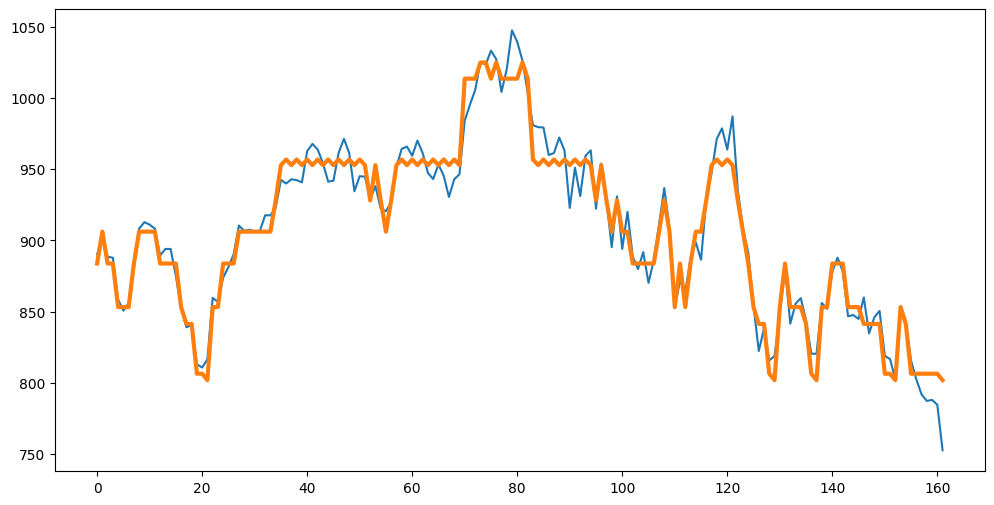

In [99]:
model = GaussianHMM(n_components=11,
                        covariance_type="diag",
                        n_iter=1000, algorithm="map", random_state=9)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]


plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3);

Подсчитаем ошибку RMSE:

In [97]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [103]:
len(values), len(means)

(162, 162)

In [100]:
rmse = sqrt(mean_squared_error(values, means))
rmse

12.088551116493692

**7. Попробуйте построить через среднее каждой компоненты наивный прогноз ряда.**

In [105]:
train, test = series[:125].values.reshape(-1,1), series[125:].values.reshape(-1,1) # разбивка на трейн- и тест-выборки

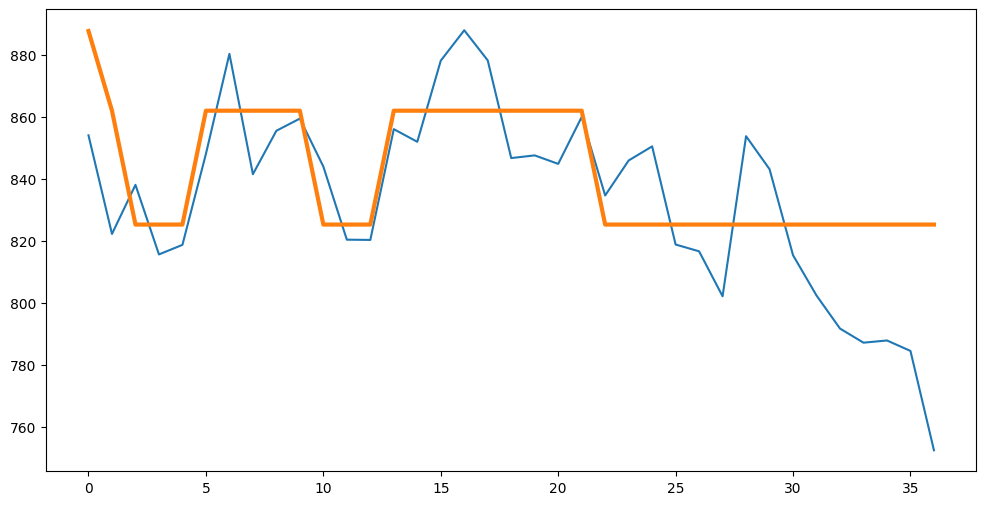

In [106]:
model = GaussianHMM(n_components=11,
                        covariance_type="diag",
                        n_iter=500, algorithm="map", random_state=9)
model.fit(train) # обучение на трейн-выборке
labels = model.predict(test) # предсказание на тесте
means = np.zeros_like(test)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]

plt.figure(figsize=(12, 6))
plt.plot(test)
plt.plot(means, linewidth=3);

Подсчитаем ошибку на тестовой выборке:

In [107]:
rmse = sqrt(mean_squared_error(test, means))
rmse

23.76894137632173

Абсолютное значие RMSE на тесте в 2 раза выше по сравнению с полученным ранее на всей выборке, но тем не менее, ошибка не слишком большая.